<h2>Step1 데이터 기초 정보 살펴보기</h2>

<h3> (1) chipotle 데이터셋의 기초 정보 출력 </h3>

In [4]:
import pandas as pd # 데이터 프레임을 자료구조로 사용
 
file_path = '../kaggle/chipotle.tsv' # **'..'은 한 폴더 위라는 의미다.
chipo = pd.read_csv(file_path, sep = '\t') # ---> read_csv() 함수로 데이터를 데이터 프레임 형태로 불러온다.

print(chipo.shape) # ---> 데이터프레임의 행과 열을 반환한다. 해당 파일은 4622행, 5열
print("----------------------------------")
print(chipo.info()) # ---> 행과 열의 구성 정보를 반환한다. 

(4622, 5)
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


🧡매빈쓰 분석🧡
<ol>
    <li>(행, 열)은 (4622, 5)</li>
    <li>(열=피처=측정요소)는 아래의 5가지로 되어 있고</li>
    <ol>
        <li>order_id</li>
        <li>quantity</li>
        <li>item_name</li>
        <li>choice_description</li>
        <li>item_price</li>
    </ol>
    <li>결측값은 유일하게 choice_description만 1246개 있다</li>
    <li>각 피처의 데이터 타입은 아래로 되어 있다.</li>
    <ol>
        <li>order_id--> 정수</li>
        <li>quantity--> 정수</li>
        <li>item_name--> 문자열</li>
        <li>choice_description--> 문자열</li>
        <li>item_price--> 문자열</li>
    </ol>
</ol>

<h4>기본자료구조: 데이터 프레임</h4>
<ul>
    <li>object: 문자열</li>
    <li>null: 결측값</li>
</ul>
ex) choice_description는 3,376개의 비어 있지 않은 문자열 데이터가 있다는 정보이다. 결측값은 (4,622-3,376=)1,246개다.

<h3> (2) 데이터셋의 데이터, 행, 열 확인</h3>

In [5]:
chipo.head(10) # ---> 10개의 데이터를 보여줍니다.

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
print(chipo.columns) # --> 행의 목록을 호출합니다.
print("----------------------------")
print(chipo.index) # --> 열의 목록을 호출합니다.

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------
RangeIndex(start=0, stop=4622, step=1)


🧡매빈쓰 분석🧡
<ol>
    <li>주문번호 N님이 시키신 메뉴 개수(item_name)와 수량(quantity)을 알 수 있군요!</li>
    <ol>
        <li>주문번호 1님은 4개 메뉴를 1개씩 시키셨네요.</li>
        <li>주문번호 2님은 1개 메뉴를 2개 시키셨네요.</li>
        <li>주문번호 3님은 2개 메뉴를 1개씩 시키셨네요.</li>
        <li>주문번호 4님은 2개 메뉴를 1개씩 시키셨네요.</li>
        <li>주분번호 5님은 1+a개 메뉴를 1개 혹은 N개씩 시키셨네요.</li>
    </ol>
    <li>같은 메뉴라도 상세 선택이 다르다면 가격이 다르군요!</li>
    <ol>
        <li>주문번호 2님이 시키신 chicken bowl은 2개 가격이 16.98인데</li>
        <li>주문번호 3님이 시키신 chicken bowl은 1개 가격이 10.98이네요</li>
    </ol>
    <ol>
        <li>주문번호 4님이 시키신 steak burrito은 1개 가격이 11.75인데</li>
        <li>주문번호 5님이 시키신 steak burrito은 1개 가격이 9.25이네요</li>
    </ol>
    <li>수치형/범주형 피처로 나눠보면! --> 후에 사용될 함수가 달라지므로 중요합니다!</li>
    <ol>
        <li>order_id는 숫자형 자료지만, 순서있는 범주형 피처네요</li>
        <li>quantity는 숫자형 자료이고, 연속형 수치형 피처네요.</li>
        <li>item_name은 문자열 자료고, 순서없는 범주형 피처네요.</li>
        <li>choice_description은 어떻게 봐야 할까요...?</li>
        <li>itme_price는 문자열 자료고, 연속형 수치형 피처네요.</li>
    </ol>
</ol>

<h4>🔴데이터 피처들의 속성🔴</h4>
<ol>
    <li>수치형 피처(Numerical Feature)</li>
    <ul><li>연속형 피처</li>
    <ul><li>어떤 구간 안의 모든 값(연속적)</li>
        <li>quantity, item_price, 키, 몸무게</li></ul>
    <li>비연속형 피처</li>
    <ul><li>일정 구간 안에서 정해진 몇 개의 값</li>
        <li>나이</li></ul></ul>
    <li>범주형 피처(Catagorical Feature)</li>
    <ul><li>순서 있는 범주형 피처</li>
        <ul><li>순서는 있음, 숫자는 아님</li>
            <li>order_id, 학점</li></ul>
        <li>순서 없는 범주형 피처</li>
            <ul><li>데이터가 구분됨, 순서는 없음</li>
            <li>item_name, 혈액형</li></ul></ol>

<h3>(3) 수치형 피처의 기초 통계량</h3>

해당 데이터셋에서 수치형 피처는 quantity, item_price가 있다.

In [7]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 숫자의 의미가 아니기 때문에 str로 변환한다.
print(chipo.describe()) # ---> describe(chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 반환한다.)

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


🧡매빈쓰 분석🧡<br>
위의 데이터셋에서 수치형 피처는 quantity인데요.
1. qunatity의 평균이 1.075인 것으로 보아, 대부분의 사람들은 하나의 메뉴를 1개 시켜 먹나 봐요. ---> 이런 것을 ⭐️Insight⭐️라고 한대요
2. 한 개의 메뉴를 15개 시켜먹은 경우가 있네요. 아마 단체 손님이었겠죠??

🔔질문!!!🔔</br>

🙋‍♀️수치형 피처는 quantity, item_price인데 왜 quantity만 한 거에요???<br>
🙇‍♀️네! 좋은 질문입니다!!!<br>
item_price는 문자열로 되어 있기 때문에, describe()를 사용할 수 없어요 ㅠ__ㅠ<br>
그렇지만! 데이터 전처리 과정을 거치면 사용할 수 있답니다!! ---> Step3에서 배울 것임!<br>

<h3>(4) 범주형 피처의 개수</h3>

In [8]:
print(len(chipo['order_id'].unique())) # --> order_id의 범주의 길이를 반환한다.
print(len(chipo['item_name'].unique())) # --> item_name의 범주의 길이를 반환한다.

1834
50


🧡매빈쓰 분석🧡<br>
1. 주문번호가 1834까지 있구나!<br>
2. 프렌차이즈의 메뉴는 50가지구나!...요리사 대단하다!!<br>

<h2>Step2 데이터 탐색과 시각화로 인사이트 발견하기</h2>

<h3> 탐색(1) 가장 많이 주문한 아이템 TOP 10 </h3>

In [9]:
item_count = chipo['item_name'].value_counts()[:10] # --> 데이터프레임['피처']는 데이터프레임을 시리즈객체로 반환하여.개수(를 셉니다.)

for idx, (val, cnt) in enumerate(item_count.iteritems(), 1): # ---> 솔직히 이해 못 함
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


🔔질문!!!🔔

🙋‍♀️선생님!! 데이터 프레임은 뭐고 시리즈 객체는 무엇인가요??!<br>
🙇‍♀️네~ 판다스의 자료구조는 아래의 3가지고 구성되어 있으며, 모두 키와 인덱스를 포함합니다.
<ol>
    <li>시리즈 --> 1차원</li>
    <li>데이터 프레임 --> 2차원</li>
    <li>패널</li>
</ol>

<h4>파이썬의 반복문 - for문</h4> ---> 이걸 봐도 이해 못함

python의 for문 사용법입니다.<br>
<p>
    <b>1. 기본 구조</b><br>
for item in iterable: # ---> iterable: 반복가능한 개체 <br>
    ------반복할 구문------
</p>
<p>
    <b>2. 반복할 범위 설정</b><br>
    for i in range(시작숫자, 종료숫자, step):<br>
        print(i)
</p>
<p>
    <b>3.인덱스 번호와 컬렉션의 원소를 tuple 형태로 반환</b><br>
    for i in enumerate(t):<br>
        print(p)
</p>


**반복가능한개체?? list, dictionary, set, string, tuple, bytes

<h3>탐색(2) 아이템별 주문 개수와 총량</h3>

In [10]:
# <----------------------주문 개수-------------------------->
# 판다스의 groupby()는 데이터 프레임에서 특정 피처를 기준으로 그룹을 생성합니다.
# 이는 그룹별 연산을 가능하게 합니다.
order_count = chipo.groupby('item_name')['order_id'].count() # --> item_name 기준으로 order_id 개수를 반환합니다.
order_count[:10]

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

🧡매빈쓰 분석🧡<br>
1. item_naem을 기준으로 정렬합니다.<br>
2. 문자보다는 숫자가 앞에 옵니다.<br>

In [11]:
# <-----------------------주문 총량---------------------------->
item_quantity = chipo.groupby('item_name')['quantity'].sum() # --> item_name 기준으로 quantity 합을 반환합니다.
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

<h3>데이터 시각화 하기</h3>

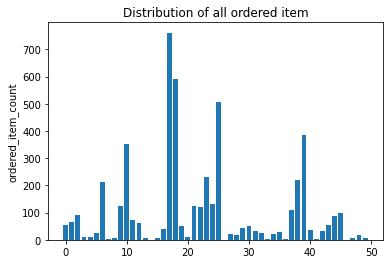

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

<h2>Step3 데이터 전처리 함수 사용하기</h2>

In [12]:
print(chipo.info())
print('-----------------------------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
-----------------------------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [13]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


<h2>Step4 탐색적 분석하기</h2> --> 탐색적 분석의 목적은 ⭐️insight⭐️를 얻는 것입니다!!

<h3>주문당 평균 계산금액 출력하기</h3>

In [14]:
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

⭐️매빈쓰 insight⭐️: 주문번호당 평균 18달러를 벌겠구나!!

<h3>한 주문에 10달러 이상 지불한 주문 번호 출력하기</h3>

In [16]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


⭐️매빈쓰 insight⭐️: 주문번호당 평균 18달러를 벌겠구나!!

<h3>각 아이템의 가격 구하기</h3>

In [30]:
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = 'item_price', ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


아이템의 가격 분포 그래프를 출력해보기

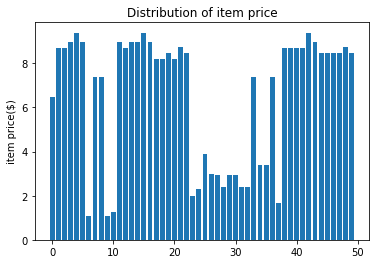

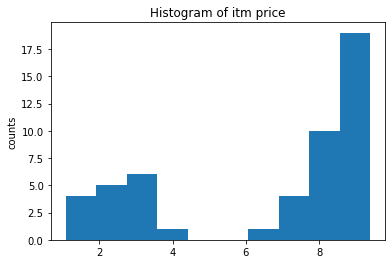

In [32]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
plt.show()

plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of itm price')
plt.show()

<h3>가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기</h3>

In [33]:
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


<h3>Veggie Salad Bowl이 몇 번 주문되었는지 구하기</h3>

In [35]:
chipo_salad = chipo[chipo['item_name']=="Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


<h3>Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기</h3>

In [37]:
chipo_chicken = chipo[chipo['item_name']=="Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity']>=2]
print(chipo_chicken_result.shape[0])

33
